In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from utils import extract_dates, get_val_scores

In [3]:
df = pd.read_csv('/Users/harleyhoffmann/dat-02-22/ClassMaterial/Unit3/data/ks2.csv', parse_dates=['deadline', 'launched' ])

In [4]:
df = extract_dates(df, date_parts=['year', 'quarter','month','day'], drop_cols=True)

In [5]:
X=df.drop('state', axis=1)
y=df['state']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

In [7]:
y_train.mean()
#if we're doing classification, we want to make sure we're getting the right number of T/F in each category

0.3616004696942601

In [8]:
y_test.mean()
#if we're doing classification, we want to make sure we're getting the right number of T/F in each category

0.3615958753424842

In [9]:
X_train.groupby('category')['goal'].mean().reset_index().rename({'goal':'cat_avg'})
#make the new columns gucci

,category,goal
0,3D Printing,42260.387326
1,Academic,59663.954143
2,Accessories,14582.109859
3,Action,332946.259187
4,Animals,10904.428738
...,...,...
154,Woodworking,12402.223962
155,Workshops,10100.459850
156,World Music,30858.908665
157,Young Adult,31480.526200


In [10]:
cat_avgs = X_train.groupby('category')['goal'].mean().reset_index().rename({'goal':'cat_avg'}, axis=1)

In [11]:
X_train.merge(cat_avgs, on='category', how='left')

,ID,name,category,main_category,currency,country,goal,deadline_year,deadline_quarter,deadline_month,deadline_day,launched_year,launched_quarter,launched_month,launched_day,deadline_history_days,launched_history_days,cat_avg
0,1327273987,The Amazing Adventures of Lucky Cent,Children's Books,Publishing,EUR,IE,50845.73,2015,2,6,13,2015,2,5,14,2232,16569,11630.582127
1,1828626910,"the ""NEW GUY""",Ready-to-wear,Fashion,USD,US,5000.00,2017,4,10,28,2017,3,9,28,3100,17437,43685.864211
2,780483037,Noah's Ark: The Anthropology of Genesis,Academic,Publishing,USD,US,5000.00,2016,2,6,8,2016,2,5,3,2593,16924,59663.954143
3,866180756,MANKILLER,Documentary,Film & Video,USD,US,150000.00,2015,2,4,8,2015,1,3,9,2166,16503,50605.956088
4,391306075,"Fly Angel, Fly",Fiction,Publishing,USD,US,5000.00,2016,4,10,2,2016,3,8,23,2709,17036,35457.278763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296358,1215261711,Still Standing: A Comedy Concert about Defianc...,Comedy,Film & Video,USD,US,25000.00,2015,4,11,13,2015,4,10,19,2385,16727,89964.601871
296359,647146559,Duncan's Piping Tunes,Music,Music,USD,US,2000.00,2018,1,1,1,2017,4,11,9,3165,17478,21058.910172
296360,2026033999,DiceAFARI: A Photo Safari Board Game,Tabletop Games,Games,USD,US,5000.00,2011,4,12,20,2011,4,11,14,961,15292,14846.566254
296361,1887710125,A Toast to Progress! Building The New Buffalo ...,Food,Food,USD,US,27500.00,2013,3,9,10,2013,3,8,9,1591,15926,43539.555647


In [12]:
X_train = X_train.merge(cat_avgs, on='category', how='left')
X_test = X_test.merge(cat_avgs, on='category', how='left')
#merging the averages into both the training and test sets

In [13]:
pipe = make_pipeline(OrdinalEncoder(), xgb.XGBClassifier())
#should be using XGBoost but need to fix that issue so using GBClassifier

In [14]:
pipe.fit(X_train, y_train)

/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['name', 'category', 'main_category',
                                      'currency', 'country'],
                                mapping=[{'col': 'name',
                                          'data_type': dtype('O'),
                                          'mapping': The Amazing Adventures of Lucky Cent                                1
the "NEW GUY"                                                       2
Noah's Ark: The Anthropology of Genesis                             3
MANKILLER                                                           4
Fly Angel, Fly                                                      5
                                                                ...  
Still Standing: A Comedy Concert about Defiance & Survival!    294499
Duncan's Piping Tunes                                          29...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                     

In [15]:
pipe.score(X_test, y_test)

/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.6869795251784967

In [16]:
from sklearn.metrics import classification_report, plot_confusion_matrix
#two reports we can use to visualize hour model is performing

/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


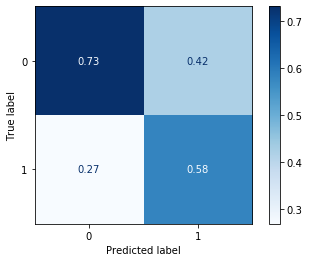

In [17]:
import matplotlib.pyplot as plt
plot_confusion_matrix(pipe, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='pred');

In [18]:
#when our model is fitting our data it's trying to prevent the overall loss
#the more frequent our labels, the better the prediction

In [19]:
print(classification_report(y_test, pipe.predict(X_test)))
#precision - what % of the time were we actually right - (tp/tp+fp)
#recall - of all the certain campaigns that happened, how accturate were we - aka really good at predicting negatives tp/(tp+fn)

/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

           0       0.73      0.80      0.77     47300
           1       0.58      0.48      0.53     26791

    accuracy                           0.69     74091
   macro avg       0.66      0.64      0.65     74091
weighted avg       0.68      0.69      0.68     74091



In [20]:
#dating app would do prediction -- dating app would not want to overspam you with peeps, they want just the precise ones
#fraud detection would look toward recall -- doesn't matter how many people get a notification, but would rather notify you just incase

In [21]:
#recall - minimize the false positives
#precision - minimize the false negatives

In [22]:
#f1 score - combination of the two, the score is biased towards the balance of the two

In [23]:
pipe[-1].get_params()
#scale positive weight - the 1 or 0 that occurs the least frequently, this would increase it - is what you would use for xgboost
#if it occurs 1/3 of the time, set it to three, if it occurs 1/10 of the time, set to 10

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [24]:
pipe.predict_proba(X_test)[:,1]
#predicting that it's going to be a successful campaign
#the error column would be (1 - the column above)

/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([0.3838017 , 0.45634675, 0.11490539, ..., 0.30867136, 0.80973464,
       0.31896445], dtype=float32)

In [25]:
#we're taking our training set and further splitting it into a validation set
#y_train is now in the stratify
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=1985)

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_test, pipe.predict(X_test))
#get the F1 score right off the bat for true predictions

/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.5255319148936171

In [30]:
#loop through positive weights to find the best score
#not a bad idea to do this toward the beginning since this can effect the model a lot
#this is for the XGBoost -- 
pos_weights = [1, 2, 3]
cv_scores = []

for weight in pos_weights:
    pipe[-1].set_params(scale_pos_weight=weight)
    pipe.fit(X_train, y_train)
    val_score = f1_score(y_val, pipe.predict(X_val))
    print(f"Validation score with weight of {weight}: {val_score}")
    cv_scores.append((val_score, weight))
        

/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Validation score with weight of 1: 0.5165512143033157


/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Validation score with weight of 2: 0.607190157200714


/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation score with weight of 3: 0.6047000476245217


/Users/harleyhoffmann/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


#if we were doing a gradient boosting classifer model -- 

n_estimators = [100, 200, 500]
cv_scores = []

for estimator in n_estimators:
    pipe[-1].set_params(n_estimators=estimator)
    pipe.fit(X_train, y_train)
    val_score = f1_score(y_val, pipe.predict(X_val))
    print(f"Validation score with estimator of {estimator}: {val_score}")
    cv_scores.append((val_score, estimator))